In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# Introduction à Scipy

Scipy contient des implémentations de plusieurs algorithmes numérique : 
* Fonctions spéciales
* Intégrales
* Equations différentielles
* Optimisation
* Algebre linéaires
* Transformée de Fourier

## Fonctions spéciales

Fonctions qui ne sont pas dans numpy : Bessel, Airy, fonction d'erreur, ... (Ce sont des fonctions définies par des intégrales)

Exemple : fonction erreur
    $$ \mathrm{erf}(x) = \int_0^x \frac{2}{\sqrt{\pi}} e^{-t^2} dt$$

In [2]:
from scipy.special import erf

erf(1)

0.8427007929497148

## Intégrales numériques

### Intégrale d'une fonction : 

Il existe plusieurs algorithme. Le plus simple : ``quad``



In [3]:
import numpy as np
from scipy.integrate import quad

In [6]:
quad?

In [5]:
def ma_fonction(t):
    return 2/np.sqrt(np.pi)*np.exp(-t**2)

# Renvoie la valeur et une estimation de l'incertitude
res, err = quad(ma_fonction, 0, 1)
print(res)
print(res - erf(1))

0.8427007929497149
1.1102230246251565e-16


In [7]:
def ma_fonction(t, sigma):
    return np.exp(-t**2/(2*sigma**2))

quad(ma_fonction, 0, 1, args=(0.45,))


(0.5491762723634688, 6.09708142155739e-15)

### Remarques

**Si on connait la fonction, ne pas en faire un tableau**

La fonction quad calcul automatiquement les points pour l'intégrale afin d'atteintre une erreur donnée

La fonction quad peut intégrer sur des bornes infinies (``np.inf``)

In [8]:
list_of_points = []
def ma_fonction(t):
    list_of_points.append(t)
    return 2/np.sqrt(np.pi)*np.exp(-t**2)
res, err = quad(ma_fonction, 0, np.inf)
print(res)
print("Nombre de points :" , len(list_of_points))
#print(list_of_points)
print("Erreur :", np.abs(res - 1 ))

0.9999999999999998
Nombre de points : 135
Erreur : 2.220446049250313e-16


In [10]:
print(len(list_of_points))

135


### Intégrales d'un tableau de points

Utiliser la fonction trapz ou simps

11.5

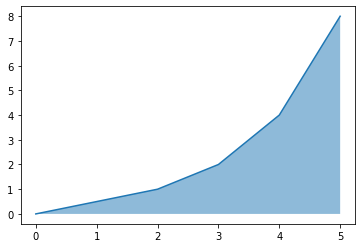

In [11]:
from scipy.integrate import trapz

data_y = [0, 1, 2, 4, 8]
data_x = [0, 2, 3, 4, 5]

plt.plot(data_x, data_y)
plt.fill_between(data_x, data_y, alpha=.5)

trapz(data_y, data_x)

## Equations différentielles

La librairie ``scipy.integrate`` contient des fonctions pour résoudre les équations différentielles ordinaires, c'est à dire des équations de la forme:

$$\frac{dy}{dt} = f(t, y)$$
    
avec conditions initiales (on connait $y$ à l'instant $t_0$). La variable $y$ peut être un tableau numpy.

On utilise la fonction ``solve_ivp`` (remplace ``ode`` ou ``odeint``): 

    def solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, ...)
    
Il existe plusieurs méthodes d'intégration (par défaut Runge-Kutta d'ordre 5(4) qui adapte la taille des pas)

La fonction ``solve_ivp`` renvoie un objet (dictionnaire) qui le résultat (res.y) mais aussi d'autres informations sur la convergence de l'algorithme.

Exemple : 
$$\frac{dy}{dt} = -y$$    



In [12]:
from scipy.integrate import solve_ivp
# Solve initial value problem

def f(t, y):
    return -y

res = solve_ivp(f, t_span=[0, 4], y0=[1], t_eval=np.linspace(0, 4, 11), rtol=1E-7, atol=1E-7)
res

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 122
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ])
 t_events: None
        y: array([[1.        , 0.67032003, 0.44932895, 0.30119422, 0.20189653,
        0.13533529, 0.09071795, 0.06081007, 0.04076222, 0.02732372,
        0.01831566]])
 y_events: None

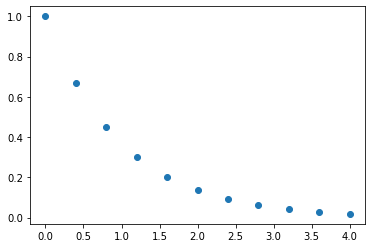

In [13]:
plt.plot(res.t, res.y[0], 'o')

In [14]:
res.y[0, -1] - np.exp(-4)

1.773130557311542e-08

In [15]:
len(res.t)

11

In [16]:
# Utilisation d'un paramètre 
def f(t, y, tau):
    return -y/tau

res = solve_ivp(lambda t, y:f(t, y, tau=0.1), t_span=[0, 4], y0=[1], t_eval=np.linspace(0, 4, 11))
res

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 140
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ])
 t_events: None
        y: array([[ 1.00000000e+00,  1.83531441e-02,  3.36575782e-04,
         6.25529975e-06,  1.60535093e-07,  1.43992293e-07,
         9.50371941e-07,  7.83634365e-09, -2.64102615e-07,
        -4.41883282e-07,  2.53752885e-07]])
 y_events: None

## Equations différentielles d'ordre élevé

L'astuce consiste à augmenter la dimension de $y$ en rajoutant des fonctions intermédiaires qui sont les dérivées de la fonction initiale.

Par exemple l'équation 

$$\frac{d^2y}{dt^2} = \frac{f(y)}{m}$$

devient 

$$\frac d{dt} \begin{pmatrix}
y \\ 
y ^\prime
\end{pmatrix} = \begin{pmatrix}
y ^\prime \\
f(y)/m
\end{pmatrix} = F(y, y^\prime)$$


Voir le TD

# Optimisation
* Zeros d'une fonction
* Minimum
* Ajustement d'une courbe

Exemple : 
* première solution $>0$ de $\tan(x)=x$
* Premier minimum de $sinc(x)$

(-10.0, 10.0)

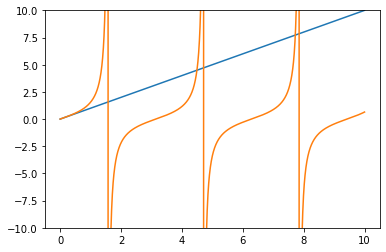

In [17]:
x = np.linspace(0, 10, 2001)
plt.plot(x, x)
plt.plot(x, np.tan(x))
plt.ylim(-10, 10)

In [18]:
from scipy.optimize import root_scalar

def f(x):
    return np.tan(x) - x

res = root_scalar(f, bracket=[4, 4.7], method='brentq')
res

      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 11
           root: 4.493409457909064

4.493409457909064

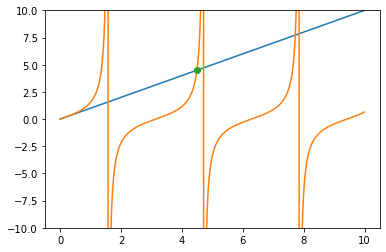

In [19]:
x = np.linspace(0, 10, 2001)
plt.plot(x, x)
plt.plot(x, np.tan(x))
plt.ylim(-10, 10)
plt.plot(res.root, [f(res.root)+res.root], 'o')

res.root

### Minimisation

In [20]:
def french_sinc(x):
    return np.sinc(x/np.pi)

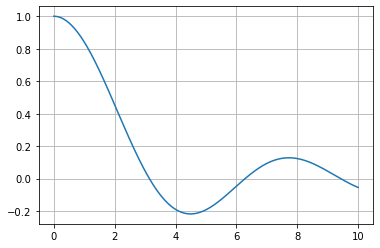

In [21]:
plt.plot(x, french_sinc(x))
plt.grid()

In [22]:
from scipy.optimize import minimize_scalar

In [23]:
res = minimize_scalar(french_sinc, [4, 4.71])
res

     fun: -0.21723362821122166
    nfev: 13
     nit: 9
 success: True
       x: 4.493409460723795

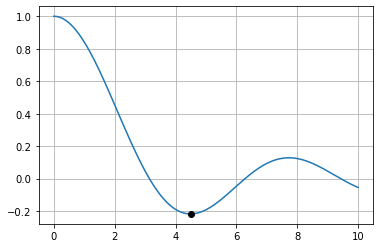

In [24]:
plt.plot(x, french_sinc(x))
plt.grid()
plt.plot(res.x, res.fun, 'ko')

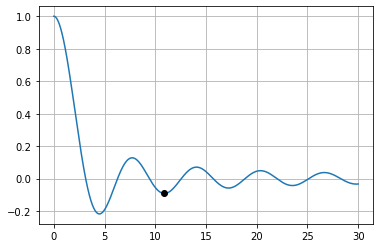

In [25]:
x = np.linspace(0, 30, 2001)
plt.plot(x, french_sinc(x))
plt.grid()
res = minimize_scalar(french_sinc, [10, 205])
plt.plot(res.x, res.fun, 'ko')

# Algèbre linéaire

numpy.linalg et scipy.linalg (plus de fonction dans scipy)

* Matrice : np.matrix (produit matriciel)
* Inverse de matrice
* Diagonalisation/valeurs propres/vecteurs propres

Exemple: valeurs propres de 
$$\begin{bmatrix}
1 & 1 & 0\\
1 & 0 & 1 \\
0  & 1 & -1\\
\end{bmatrix}$$

Tracer les vp en fonction de $\delta$ pour $\Omega=1$
$$\begin{bmatrix}
\delta & \frac\Omega2 & 0\\
\frac\Omega2 & 0 & \frac\Omega2 \\
0  & \frac\Omega2 & -\delta\\
\end{bmatrix}$$

In [26]:
H = np.matrix([[1, 1, 0], [1, 0, 1], [0, 1, -1]])
H

matrix([[ 1,  1,  0],
        [ 1,  0,  1],
        [ 0,  1, -1]])

In [28]:
from scipy.linalg import eigh # Matrice hermicienne

eigh(H) # Renvoie les valeurs propres et vecteurs propres

(array([-1.73205081,  0.        ,  1.73205081]),
 array([[-0.21132487,  0.57735027,  0.78867513],
        [ 0.57735027, -0.57735027,  0.57735027],
        [-0.78867513, -0.57735027,  0.21132487]]))

In [29]:
def trois_niveaux(delta, omega):
    H = np.matrix([[delta, omega/2, 0], [omega/2, 0, omega/2], [0, omega/2, -delta]])
    return eigh(H)[0]
    
all_delta = np.linspace(-5, 5)
sans_couplage = np.array([trois_niveaux(delta, omega=0) for delta in all_delta])
avec_couplage = np.array([trois_niveaux(delta, omega=1) for delta in all_delta])

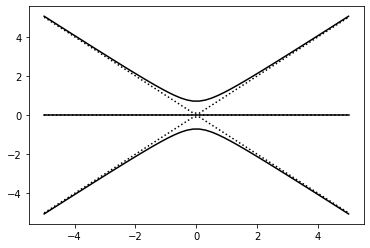

In [32]:
plt.plot(all_delta, sans_couplage, 'k:')
plt.plot(all_delta, avec_couplage, 'k-')